In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Mouse Events

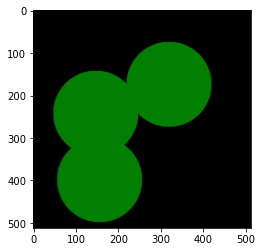

In [8]:
# esc to kill window

def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x, y), 100, (0, 255, 0), -1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x, y), 100, (255, 0, 0), -1)
        
cv2.namedWindow(winname='draw')

cv2.setMouseCallback('draw', draw_circle)

img = np.zeros((512, 512, 3), dtype=np.int8)

## ** grey canvas because the value range of np.int8 between -128 ... 127.. thus any value starting from 0 will +127.
# [-128,127] is mapped to [0,255]
# uint8 = 0..255
while True:
    cv2.imshow('draw', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()
plt.imshow(img)

# notice how the color interpret by plt and cv2 differs rgb and bgr

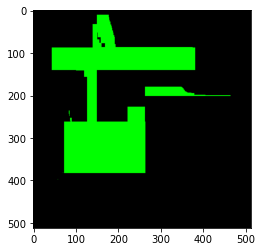

In [9]:
drawing = False
ix, iy = -1, -1
jx, jy = 0, 0

def draw_rectangle(event, x, y, flags, param):
    global ix, iy, jy, jx, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        jx, jy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:

            if x<jx or y<jy:
                cv2.rectangle(img, (ix, iy), (jx, jy), (0, 0, 0), -1)
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
            jx, jy = x, y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

        cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
        
        
        
cv2.namedWindow(winname='draw')

cv2.setMouseCallback('draw', draw_rectangle)

img = np.zeros((512, 512, 3), dtype=np.uint8)

## ** grey canvas because the value range of np.int8 between -128 ... 127.. thus any value starting from 0 will +127.
# [-128,127] is mapped to [0,255]
# uint8 = 0..255
while True:
    cv2.imshow('draw', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()
plt.imshow(img)

## Trackbar

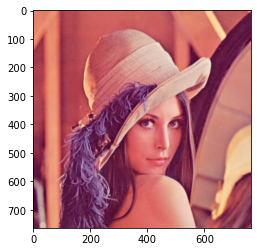

In [7]:
maxScaleUp = 100
scaleFactor = 1
windowName = "Resize Image"
trackbarValue = "Scale"

# read the image
img = cv2.imread("images/lena_std.tif")

# Create a window to display results and  set the flag to Autosize
cv2.namedWindow(windowName, cv2.WINDOW_AUTOSIZE)

scaled_img = img

# Callback functions
def scaleImage(*args):
    global scaled_img
    # Get the scale factor from the trackbar 
    scaleFactor = 1+ args[0]/100.0
    # Resize the image
    scaled_img = cv2.resize(img, None, fx=scaleFactor, fy = scaleFactor, interpolation = cv2.INTER_LINEAR)
    cv2.imshow(windowName, scaled_img)

# Create trackbar and associate a callback function
cv2.createTrackbar(trackbarValue, windowName, scaleFactor, maxScaleUp, scaleImage)

# Display the image
cv2.imshow(windowName, img)

c = cv2.waitKey(0)
cv2.destroyAllWindows()
scaled_img_rgb = cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB)
plt.imshow(scaled_img_rgb)